# Observation of all the effects 

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E - \frac{\sigma}{2}(1 + i\omega\tau)\rho E - \frac{\beta^K}{2}\left|E\right|^{2K-2}E + i\frac{\omega}{c}(1-f)n_{2}\left|E\right|^2E
\end{equation}

We consider all the effects at the same time to see what happens to the laser:



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
#Import parameters from python
parameter = np.loadtxt("../results/parameter_total.txt")
Pcr = parameter[0]
k = parameter[1]
K = parameter[2]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])
w0 = parameter[8]
p = parameter[9]

#Numerical solution
inten_num = np.loadtxt("../results/intensity_total.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

energy = np.loadtxt("../results/energy_total.txt")

In [3]:
print('Information about the experiment:')
print('Initial condition: ')
print('Wave number: ',np.round(k,2))
print('Multiphoton constant: ',K)
print('Spot size: ',w0)
print('Normalised Pcr: ',Pcr)
print('Pin/Pcr: ',p)
print('Box parameters:')
print('Length of box: ',L)
print('Number of point in x and y: ',2*N)
print('Length of evolution: ',Lz)
print('Number of point z: ',Nz)

Information about the experiment:
Initial condition: 
Wave number:  8107335.88
Multiphoton constant:  7.0
Spot size:  0.0007
Normalised Pcr:  1.7e-07
Pin/Pcr:  35.0
Box parameters:
Length of box:  0.35100000000000003
Number of point in x and y:  256
Length of evolution:  3.0
Number of point z:  9000


In [4]:
print(np.sum(inten_num[0]))

5.93139240546731e-06


No handles with labels found to put in legend.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


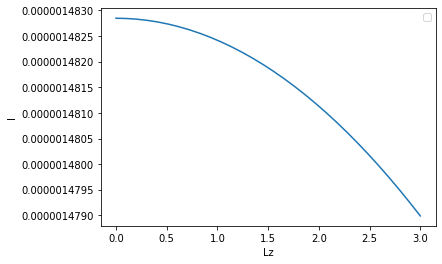

In [5]:
#Energy maximum of laser along z
list_e = []
num_point = inten_num.shape[0]
for i in range(num_point):
    list_e.append(np.max(inten_num[i]))
screen = np.linspace(0, Lz, inten_num.shape[0])
list_e = np.asarray(list_e)

Pcr_const = np.zeros(Nz) + Pcr
fig, ax = plt.subplots()
ax.plot(screen, list_e)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('Lz')
ax.set_ylabel('I')
ax.legend()
#plt.xlim(0.007, 0.009)
fig.show()

No handles with labels found to put in legend.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


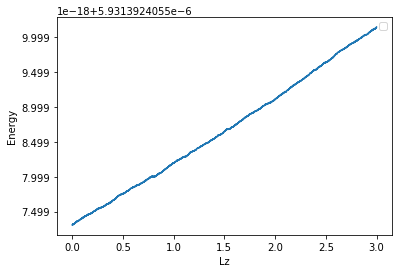

In [6]:
#Total energy of laser along z

screen = np.linspace(0, Lz, Nz)
fig, ax = plt.subplots()
ax.plot(screen, energy)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('Lz')
ax.set_ylabel('Energy')
ax.legend()
#plt.xlim(0.007, 0.009)
fig.show()

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


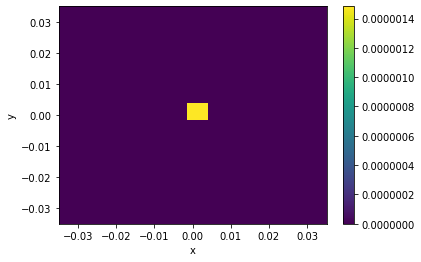

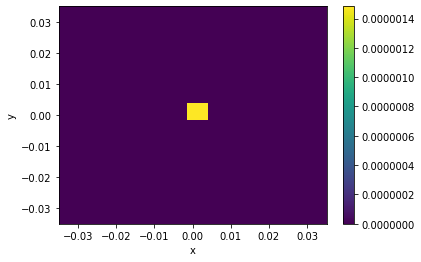

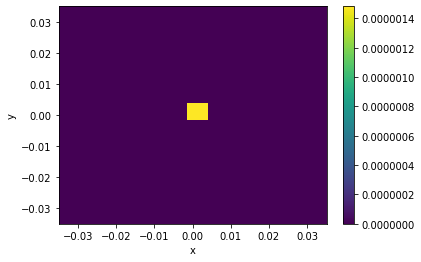

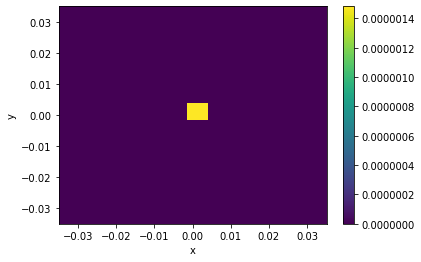

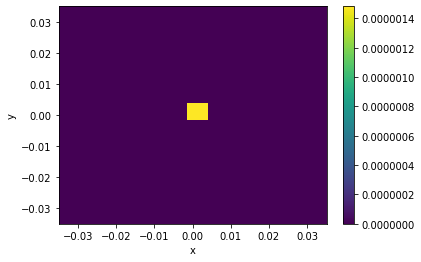

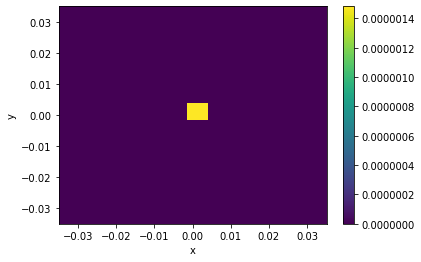

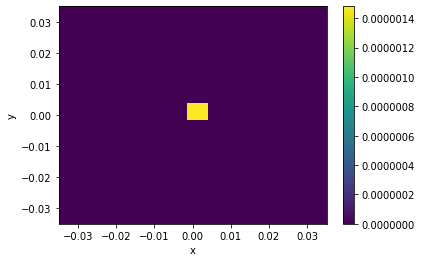

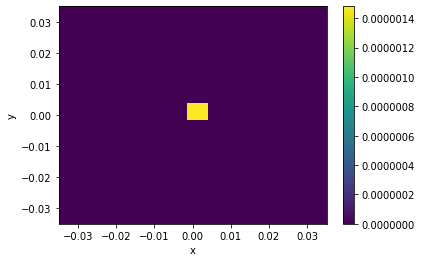

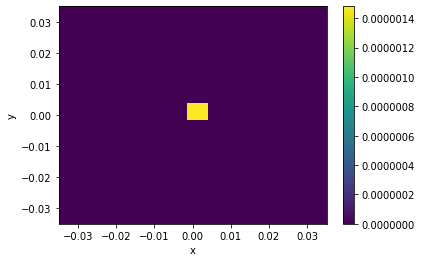

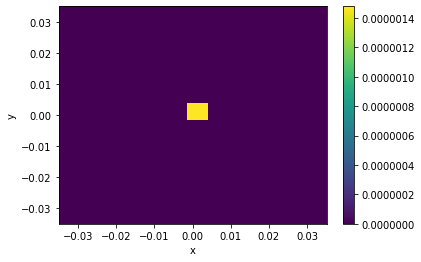

In [7]:
x = np.linspace(-L,L,2*N)
y = np.linspace(-L,L,2*N)
for i in range(inten_num.shape[0]):
    if (i%3 == 0):
        fig, ax = plt.subplots()
        mesh = ax.pcolormesh(x, y, inten_num[i])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.colorbar(mesh, ax=ax)
        plt.xlim(-0.1*L,0.1*L)
        plt.ylim(-0.1*L,0.1*L)
        fig.show()

29


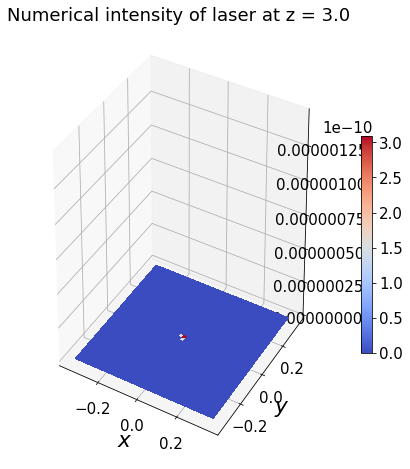

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

#3D comparison between numerical and analytical solution at arbitary z
axes = []
surfs = []
fig = plt.figure(figsize=plt.figaspect(0.5))

num_pic = inten_num.shape[0]
#print(num_pic)
z = 3.0 
pic = int((num_pic-1)*(z/Lz))
print(pic)

ax = fig.add_subplot(121,projection='3d')
title = 'Numerical intensity of laser at z = ' + str(z)
ax.title.set_text(title)
#ax.set_zlim(0, 0.8)
#ax.set_xlim(-0.002, 0.002)
#ax.set_ylim(-0.002, 0.002)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
axes.append(ax)
surf = ax.plot_surface(x,y,inten_num[pic],cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, ax=axes,shrink=0.5, aspect=20)

plt.show()

In [9]:
print(inten_num.shape)

(30, 256, 256)


IndexError: index 600 is out of bounds for axis 0 with size 30

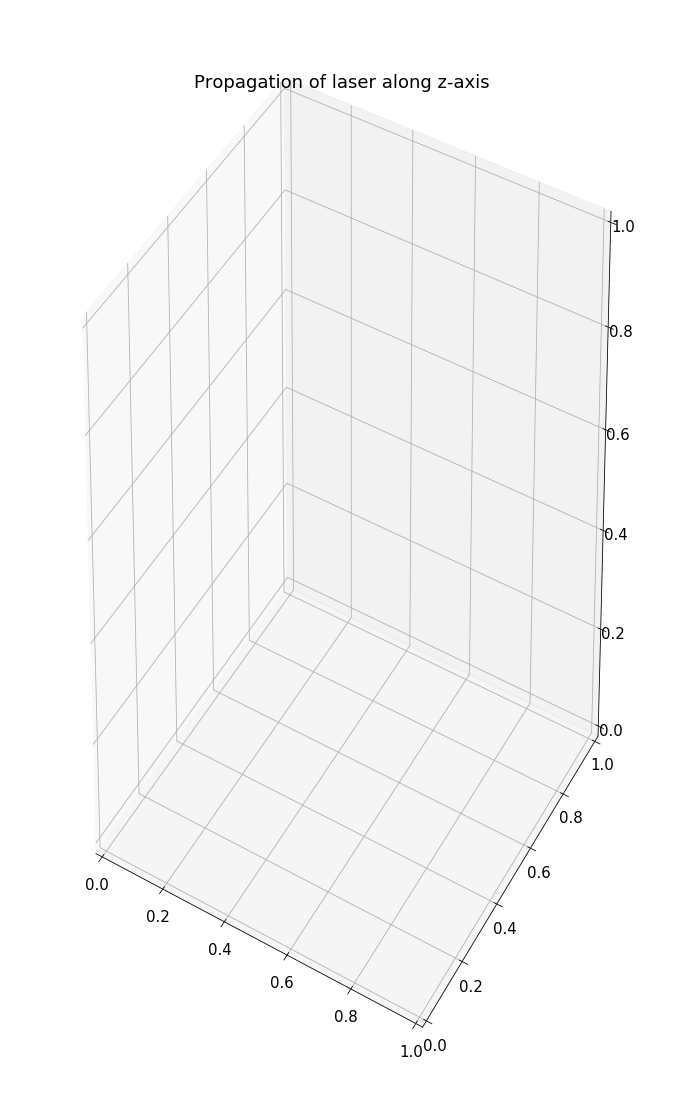

In [10]:


fig = plt.figure(figsize=(12, 20))
axes = []
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Propagation of laser along z-axis')


surf = ax.plot_surface(x,y,inten_num[600],cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.text(0.001, 0.0015,1.5*i+0.2 ,"z = %.2f m "%z_interested[i], None)
axes.append(ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-0.003, 0.003 )
ax.set_ylim(-0.003, 0.003)
ax.view_init(10, -60)
plt.show()
